In [1]:
#Write a program to find the coefficients for a linear regression model for the dataset provided (data2.txt). 
#Assume a linear model: y = w0 + w1*x. You need to
    
    # 1)Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column)
    
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

df = pd.read_csv('data2.txt',header = None)
df.columns = ["x1","y"]
#data.rename(columns={0:'x1',1:'y'},inplace=True) # rename columns
df

,x1,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


data


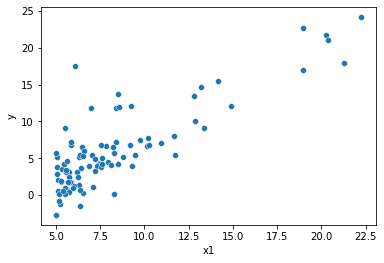

In [2]:
#df.plot(kind='scatter',x='x',y='y')
sns.scatterplot(data=df,x='x1',y='y')
print("data")

In [3]:
def normalequation(X , y):
    Xb = np.c_[np.ones(len(df)),  X]
    sigma = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)
    return sigma

sigma = normalequation(df['x1'].values, df['y'].values)
print("coefficients",sigma)

coefficients [-3.89578088  1.19303364]


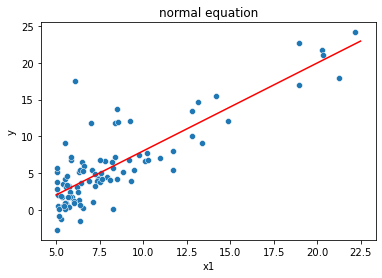

In [4]:
sns.scatterplot(data=df,x='x1',y='y').set(title='normal equation')
XA= np.linspace(5,22.5)
YA= [sigma[0]+sigma[1]*w  for w in XA]
plt.plot(XA, YA, 'r-')
plt.show()

In [5]:
df.insert(0,'x0',1) # add bias


In [6]:
from sklearn.model_selection import train_test_split  # split dataset

X = np.matrix(df[["x0","x1"]])
y = np.matrix(df[["y"]])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
def Cost_BGD(X,y,w):
    cost = np.sum(np.power(((X @ w.T) - y), 2))/(2 * len(X)) 
    return cost

In [8]:
def Batch_GD(X, y, theta, alpha, epochs):
    
    temp = np.matrix(np.zeros(theta.shape))    
    w = int(theta.ravel().shape[1]) # initialization w    
    cost = np.zeros(epochs)
    
    for i in range(epochs):        
        error = (X * theta.T) - y # error 
        
        for j in range(w):
            term = np.multiply(error, X[:,j]) # gradient for x0 and x1            
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term)) # updated gradient
            
        theta = temp        
        cost[i] = Cost_BGD(X,y,theta) # get the cost of each updated w        
    return theta, cost

The final paramater is[[-0.25379863  0.84744426]]
The final cost is 5.680444310560062


Text(0.5, 1.0, 'MSE vs Iteration in Training Dataset-BGD')

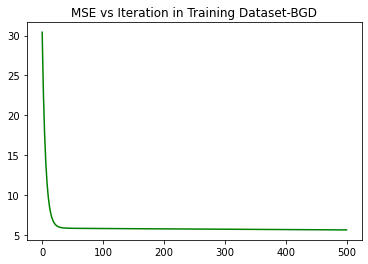

In [9]:
theta = np.matrix(np.array([0,0]))
alpha = 0.001
epochs = 500

w,error = Batch_GD(X_train, y_train, theta, alpha, epochs)
print("The final paramater is"+ str(w))
print("The final cost is "+ str(error[-1]))

plt.plot(np.arange(epochs), error, 'g-')
plt.title("MSE vs Iteration in Training Dataset-BGD")

The final paramater is[[-0.21686851  0.70957322]]
The final cost is 5.272687561941257


Text(0.5, 1.0, 'MSE vs Iteration in Testing Dataset-BGD')

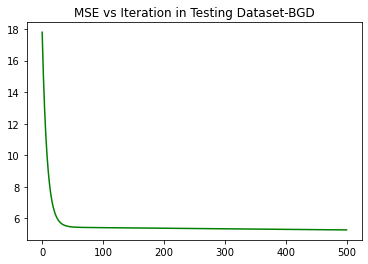

In [10]:
theta = np.matrix(np.array([0,0]))
alpha = 0.001
epochs = 500

w,error = Batch_GD(X_test, y_test, theta, alpha, epochs)
print("The final paramater is"+ str(w))
print("The final cost is "+ str(error[-1]))

plt.plot(np.arange(epochs), error,'g-')
plt.title("MSE vs Iteration in Testing Dataset-BGD")

In [11]:
def Cost_SGD(X,y,w):
    cost = np.power(((X @ w.T) - y), 2) /2  
    return cost

In [12]:
import random 
random.seed(42)

def SGD(X, y, theta, alpha, epochs):    
    
    temp = np.matrix(np.zeros(theta.shape)) 
    w = int(theta.ravel().shape[1]) # initialization w    
    cost = np.zeros(len(X))    
    avg_cost = np.zeros(epochs)
    
    for k in range(epochs):        
        random_index  = np.random.choice(len(X), len(X), replace=False)
        
        for i in random_index:            
            X_sample = X[i] 
            y_sample = y[i]
            error = (X_sample * theta.T )- y_sample            
            
            for j in range(w):                
                temp[0,j] = theta[0,j] - alpha * np.sum(np.multiply(error, X_sample[:,j])) # updated gradient
                
            theta = temp # store theta after updating            
            cost[i] = Cost_SGD(X_sample,y_sample,theta)       
        
        avg_cost[k] = np.mean(cost)       
    return theta,avg_cost                


The final paramater is[[-2.74370624  1.13683271]]


Text(0.5, 1.0, 'avg-cost vs iteration in Training Dataset-SGD')

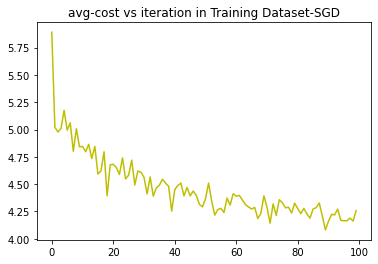

In [13]:
theta = np.matrix(np.array([0,0]))
alpha = 0.001
epochs = 100

w, avg_cost = SGD(X_train, y_train, theta, alpha, epochs)

print("The final paramater is"+ str(w))
plt.plot(np.arange(epochs), avg_cost, 'y-')
plt.title("avg-cost vs iteration in Training Dataset-SGD")

The final paramater is[[-1.06790713  0.80928586]]


Text(0.5, 1.0, 'avg-cost vs iteration in Testing Dataset-SGD')

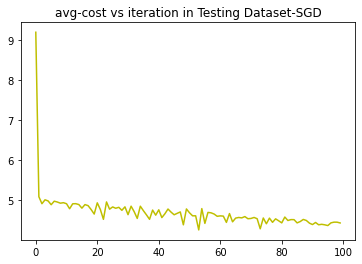

In [14]:
theta = np.matrix(np.array([0,0]))
alpha = 0.001
epochs = 100

w, avg_cost = SGD(X_test, y_test, theta, alpha, epochs)
print("The final paramater is"+ str(w))

plt.plot(np.arange(epochs), avg_cost, 'y-')
plt.title("avg-cost vs iteration in Testing Dataset-SGD")

discussion-
Batch gradient descent seemed to output a result faster than stochastic gradient descent. However, it took more epochs to do so, so therefore sgd converged faster than bgd. Looking at the cost function vs learning rate graphs, both algorithms benefit from a higher learning rate, with a logarithmic trend. However, at a certain point the learning rate becomes too high, and it starts to jump towards infinity. From testing several inputs, a rate of 1e-4 seemed to work best. Both algorithms were accurate, and it is hard to say which produced the better output.

In [15]:
learning_rate_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
cost_collect=[]
iters = 4000

for lr in learning_rate_list:
    
    g,cost = Batch_GD(X_test, y_test, theta, lr, iters)
    
    cost_collect.append(cost[-1])

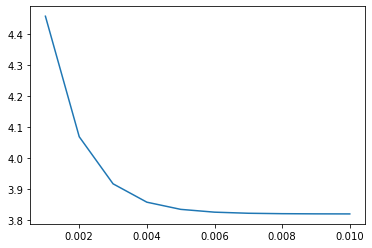

In [16]:
plt.plot(learning_rate_list,cost_collect)

In [17]:
learning_rate_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
cost_collect=[]
iters = 4000

for lr in learning_rate_list:
    
    g,cost = SGD(X_test, y_test, theta, lr, iters)
    
    cost_collect.append(cost[-1])

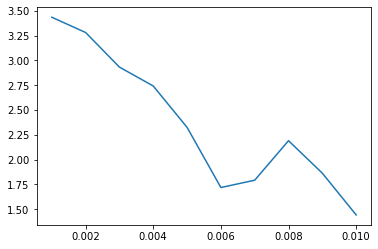

In [18]:
plt.plot(learning_rate_list,cost_collect)

0.01 is the best lr in this case